#Projet en Analyse Descriptive avec Python - Étude de la distribution des revenus au sein de la population américaine

## Problématique : Quel est le degré d'inégalité des revenus dans la population ?

###Importation des bibliothèques, du dataset et affichage des informations







In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('income.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
4,54,?,148657,Preschool,1,Married-civ-spouse,?,Wife,White,Female,0,0,40,Mexico,<=50K


In [ ]:
df.shape

(25000, 15)

Il y a 25 000 lignes et 15 colonnes : il sera donc important de bien nettoyer les données pour permettre d'avoir une analyse statistique fiable

In [ ]:
df.info() #Va nous permettre de voir le type de données que possède la dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             25000 non-null  int64 
 1   workclass       25000 non-null  object
 2   fnlwgt          25000 non-null  int64 
 3   education       25000 non-null  object
 4   education.num   25000 non-null  int64 
 5   marital.status  25000 non-null  object
 6   occupation      25000 non-null  object
 7   relationship    25000 non-null  object
 8   race            25000 non-null  object
 9   sex             25000 non-null  object
 10  capital.gain    25000 non-null  int64 
 11  capital.loss    25000 non-null  int64 
 12  hours.per.week  25000 non-null  int64 
 13  native.country  25000 non-null  object
 14  income          25000 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.9+ MB


### Nettoyage des données doublons

In [ ]:
df.duplicated().sum()

12

Il y a 12 données dupliqués dans le dataset

In [ ]:
df.drop_duplicates(inplace=True)

Les 12 lignes en double (doublons) ont été supprimés du dataset



In [ ]:
df.shape

(24988, 15)

### Nettoyage des données manquantes

In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


Il n'y a aucunes valeurs nulles dans le dataset

### Nettoyage des données aberrantes

In [ ]:
print(df.shape)

(24988, 15)


In [ ]:
24988 - 24869

119

#### Boxplot

In [ ]:
import matplotlib.pyplot as plt

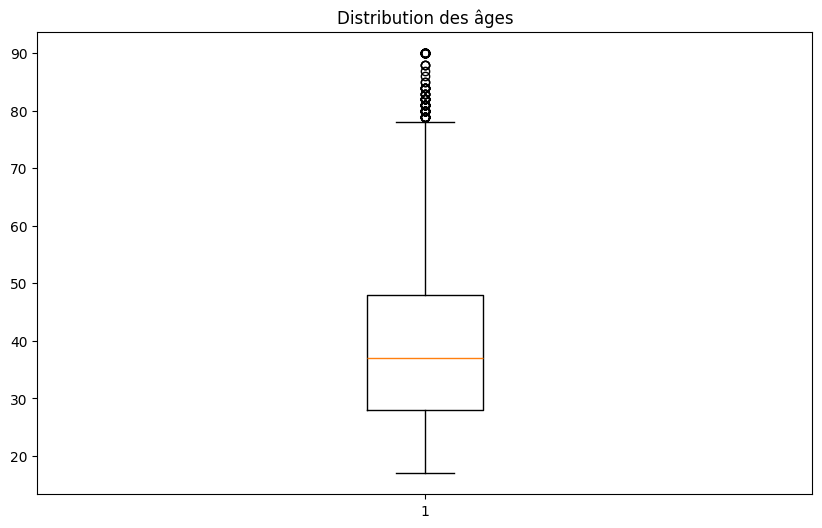

In [ ]:
# Détection des valeurs aberrantes par visualisation des âges
plt.figure(figsize=(10, 6))
plt.boxplot(df['age'])
plt.title('Distribution des âges')
plt.show()

In [ ]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
print("Q1:",Q1)
print("Q3:",Q3)

Q1: 28.0
Q3: 48.0


In [ ]:
IQR = Q3 - Q1
IQR

20.0

In [ ]:
df = df[(df['age'] >= Q1 - 1.5 * IQR) & (df['age'] <= Q3 + 1.5 * IQR)]

In [ ]:
df.shape

(24869, 15)

Passons par la suite à la colonne du nombre d'heures travaillée par semaine (hours.per.week)

In [ ]:
Q1 = df['hours.per.week'].quantile(0.25)
Q3 = df['hours.per.week'].quantile(0.75)
print("Q1:",Q1)
print("Q3:",Q3)

Q1: 40.0
Q3: 45.0


In [ ]:
IQR = Q3 - Q1
IQR

5.0

In [ ]:
df = df[(df['hours.per.week'] >= Q1 - 1.5 * IQR) & (df['hours.per.week'] <= Q3 + 1.5 * IQR)]

In [ ]:
df.shape

(18094, 15)

###  Analyse de la distribution des revenus


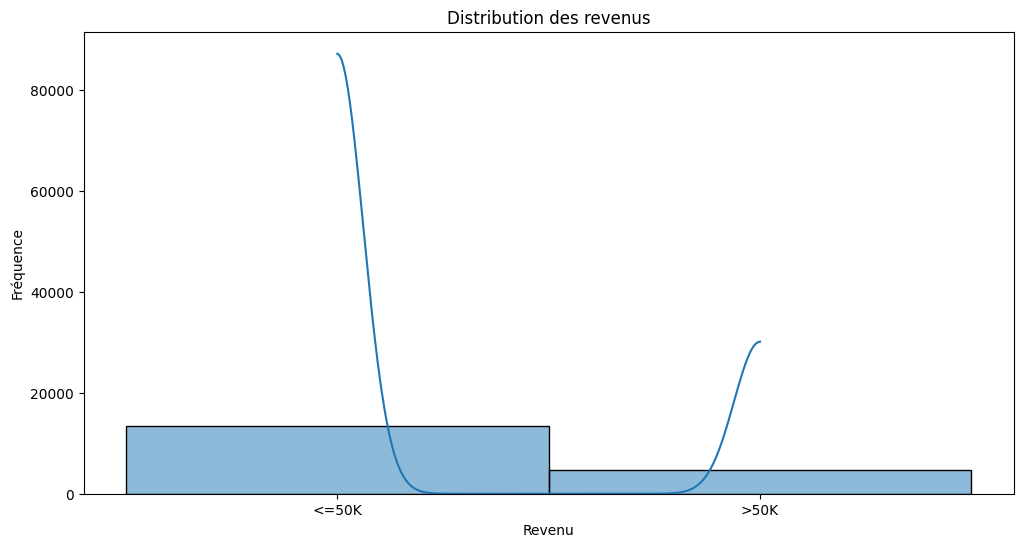

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['income'], kde=True, bins=30)
plt.title("Distribution des revenus")
plt.xlabel("Revenu")
plt.ylabel("Fréquence")
plt.show()

In [ ]:
from scipy.stats import shapiro
stat, p_value = shapiro(df['income'])
print(f"Statistique du test de Shapiro-Wilk: {stat:.4f}, p-value: {p_value:.4f}")

ValueError: could not convert string to float: '<=50K'

### Encodage

Comme il est impossible d'appliquer la loi normale sur ces données la, nous allons transformer ces données grâce à l'encodage

In [ ]:
print(df['income'].unique())

['<=50K' '>50K']


In [ ]:
df['income_encoded'] = df['income'].apply(lambda x: 0 if x == '<=50K' else 1)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,income_encoded
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K,0
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K,1
4,54,?,148657,Preschool,1,Married-civ-spouse,?,Wife,White,Female,0,0,40,Mexico,<=50K,0
6,25,Private,207875,7th-8th,4,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,Mexico,<=50K,0
7,71,Local-gov,229110,HS-grad,9,Widowed,Exec-managerial,Other-relative,White,Female,0,0,33,United-States,<=50K,0


In [ ]:
df['sex_encoded'] = df['sex'].map({'Female': 0, 'Male': 1})
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,sex,capital.gain,...,hours.per.week,native.country,income,income_encoded,income_scaled,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_encoded
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,Female,0,...,40,United-States,<=50K,0,-0.587860,False,False,False,True,0
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,Male,0,...,40,United-States,>50K,1,1.701086,False,False,False,True,1
4,54,?,148657,Preschool,1,Married-civ-spouse,?,Wife,Female,0,...,40,Mexico,<=50K,0,-0.587860,False,False,False,True,0
6,25,Private,207875,7th-8th,4,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,...,40,Mexico,<=50K,0,-0.587860,False,False,False,True,1
7,71,Local-gov,229110,HS-grad,9,Widowed,Exec-managerial,Other-relative,Female,0,...,33,United-States,<=50K,0,-0.587860,False,False,False,True,0


KeyError: "None of [Index(['race'], dtype='object')] are in the [columns]"

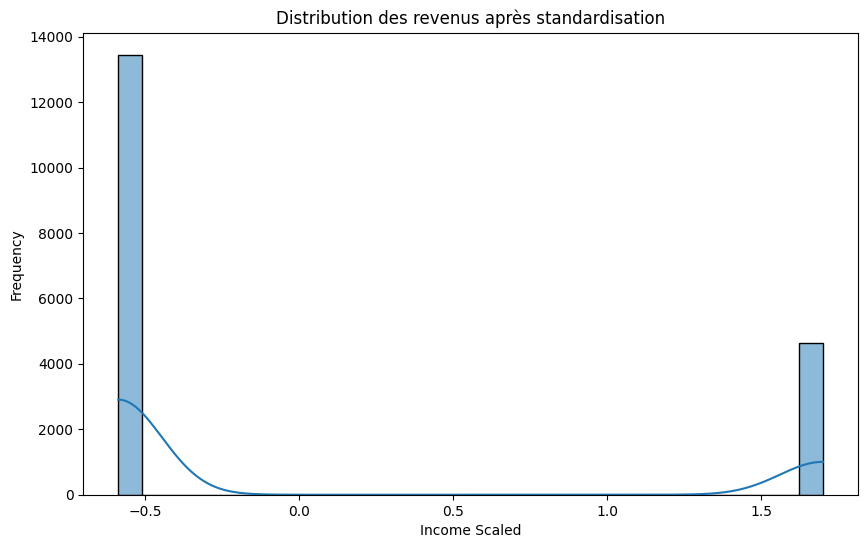

In [ ]:
scaler = StandardScaler()
df['income_scaled'] = scaler.fit_transform(df[['income_encoded']]) # Changed 'income' to 'income_encoded'

# Visualisation de l'impact de la standardisation
plt.figure(figsize=(10, 6))
sns.histplot(df['income_scaled'], bins=30, kde=True) # Changed 'income_scaled' to match the new column name
plt.xlabel("Income Scaled")
plt.ylabel("Frequency")
plt.title("Distribution des revenus après standardisation")
plt.show()

Distribution asymétrique donc pas de test de normalité ni de loi normale

In [ ]:
from scipy.stats import pearsonr
stat, p_value = pearsonr(df['income_encoded'], df['age'])
print(f"Coefficient de corrélation de Pearson entre le revenu et l'âge : {stat}, p-value : {p_value}")

# Interprétation
if p_value < 0.05:
    print("Il existe une corrélation statistiquement significative entre le revenu et l'âge.")
else:
    print("Il n'existe pas de corrélation statistiquement significative entre le revenu et l'âge.")

Coefficient de corrélation de Pearson entre le revenu et l'âge : 0.24821588077188897, p-value : 3.5749293327838664e-252
Il existe une corrélation statistiquement significative entre le revenu et l'âge.


#### Sexe et revenus

In [ ]:
from scipy.stats import ttest_ind

males = df[df['sex'] == 'Male']['income_encoded']
females = df[df['sex'] == 'Female']['income_encoded']

t_stat, p_value = ttest_ind(males, females)
print(f"T-statistic: {t_stat}, p-value: {p_value}")

if p_value < 0.05:
    print("La différence de revenus entre les sexes est significative.")
else:
    print("Il n'y a pas de différence significative de revenus entre les sexes.")


T-statistic: 28.288712279373236, p-value: 2.632143471520084e-172
La différence de revenus entre les sexes est significative.


In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country', 'income',
       'income_encoded', 'income_scaled', 'race_Asian-Pac-Islander',
       'race_Black', 'race_Other', 'race_White', 'sex_encoded'],
      dtype='object')


#### Heures au travail et revenus

In [ ]:
from scipy.stats import pearsonr

# Calcul de la corrélation entre le revenu et les heures de travail
stat, p_value = pearsonr(df['income_encoded'], df['hours.per.week'])

print(f"Coefficient de corrélation de Pearson entre le revenu et les heures de travail : {stat:.4f}, p-value : {p_value:.4e}")

# Interprétation de la p-value
if p_value < 0.05:
    print("Il existe une corrélation statistiquement significative entre le revenu et les heures de travail.")
else:
    print("Il n'existe pas de corrélation statistiquement significative entre le revenu et les heures de travail.")

Coefficient de corrélation de Pearson entre le revenu et les heures de travail : 0.2024, p-value : 1.4443e-166
Il existe une corrélation statistiquement significative entre le revenu et les heures de travail.
